In [5]:
# pip install imbalanced-learn

In [30]:
# pip install xgboost

In [7]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

# **Importing the data and Preprocessing**

In [8]:
data = pd.read_csv("/content/train_hsbc_df.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513643 entries, 0 to 513642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         513643 non-null  int64  
 1   customer     513643 non-null  object 
 2   age          513643 non-null  object 
 3   gender       513643 non-null  object 
 4   zipcodeOri   513643 non-null  object 
 5   merchant     513643 non-null  object 
 6   zipMerchant  513643 non-null  object 
 7   category     513643 non-null  object 
 8   amount       513643 non-null  float64
 9   fraud        513643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ MB


In [10]:
data.shape

(513643, 10)

In [21]:
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,3219,3,2,34,4,44.26,1
1,0,723,3,2,34,4,324.50,1
2,0,362,3,2,44,6,176.32,1
3,0,4040,3,2,44,6,337.41,1
4,0,969,4,1,2,14,220.11,1


In [12]:
data.dtypes

,0
step,int64
customer,object
age,object
gender,object
zipcodeOri,object
merchant,object
zipMerchant,object
category,object
amount,float64
fraud,int64


**Checking for null values**

In [13]:
data.isnull().sum()

,0
step,0
customer,0
age,0
gender,0
zipcodeOri,0
merchant,0
zipMerchant,0
category,0
amount,0
fraud,0


In [14]:
print(data.describe())

                step         amount          fraud
count  513643.000000  513643.000000  513643.000000
mean       94.992629      37.915481       0.012071
std        51.063474     111.557455       0.109201
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.920000       0.000000
75%       139.000000      42.550000       0.000000
max       179.000000    7665.560000       1.000000


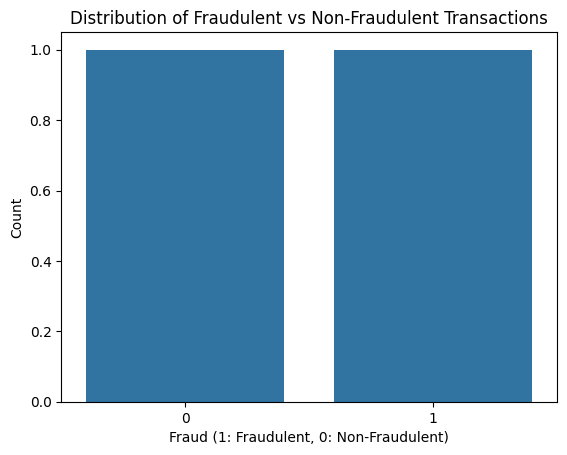

In [15]:
sns.countplot(data['fraud'].value_counts())

plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud (1: Fraudulent, 0: Non-Fraudulent)')
plt.ylabel('Count')

plt.show()

In [16]:
#Dropping Columns with only one unique value
data = data.drop(['zipcodeOri','zipMerchant'],axis=1)

In [17]:
#comverting categoral columns into numerical
c = data.select_dtypes(include= ['object']).columns
for i in c:
    data[i] = data[i].astype('category')
data[c] = data[c].apply(lambda x: x.cat.codes)

## **Applying SMOTE**: its Balances imbalanced datasets, specifically targeting the minority class.

In [18]:
x = data.drop(['fraud'], axis = 1)
y = data['fraud']

sm = SMOTE(random_state = 42)
x, y = sm.fit_resample(x, y)
y = pd.DataFrame(y)


# **Spliting dataset and training the model**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)


In [19]:
model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    152233
           1       0.99      1.00      0.99    152233

    accuracy                           0.99    304466
   macro avg       0.99      0.99      0.99    304466
weighted avg       0.99      0.99      0.99    304466



In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9933555799333916

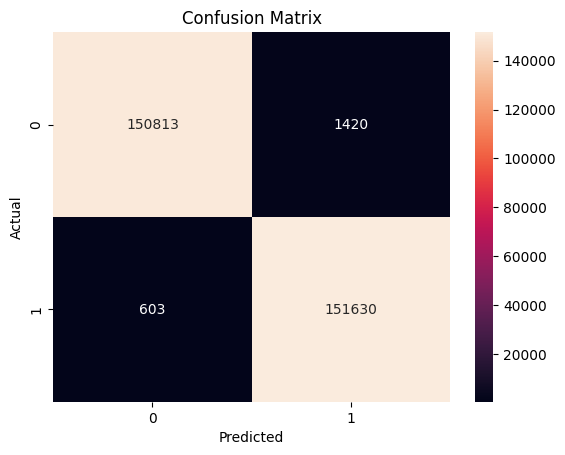

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0.9996967767646249


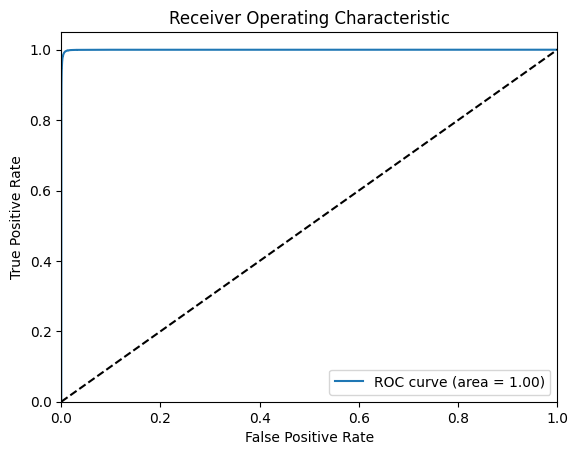

In [40]:
# ROC Curve
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
importances = model.feature_importances_
feature_names = x_train.columns  # Adjust if feature names are not available

# Print feature importances
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name} -------- {importance*100:.2f}%")

step -------- 0.46%
customer -------- 0.64%
age -------- 0.92%
gender -------- 4.61%
merchant -------- 6.32%
category -------- 15.90%
amount -------- 71.15%
